<h4>Importing required libraries</h4>

In [1]:
import geopandas
import pandas

<h4>Loading consumer deployment shapefile</h4>

In [2]:
consumer_deployment = geopandas.read_file("../../Data/Fixed_Consumer_Deployment_2020.shp")

<h4>Taking a peek at the loaded data from shapefile</h4>

In [3]:
consumer_deployment.head()

,OBJECTID,BlockCode,DBA,FRN,TechCode,Consumer,MaxAdDn,MaxAdUp,MaxDnTier,MaxUpTier,Shape_Leng,Shape_Area,BlockCodeI,bci,geometry
0,1,060230101023137,Aan Chuuphan,0000830321,70,1,3.2,1.0,5,4,0.007143,0.000002,0.0,NaN,"POLYGON ((-123.54205 41.30081, -123.54134 41.3..."
1,2,060230101023139,Aan Chuuphan,0000830321,70,1,3.2,1.0,5,4,0.011008,0.000004,0.0,NaN,"POLYGON ((-123.53944 41.30202, -123.53927 41.3..."
2,3,060230101023141,Aan Chuuphan,0000830321,70,1,3.2,1.0,5,4,0.004968,0.000001,0.0,NaN,"POLYGON ((-123.53345 41.30451, -123.53284 41.3..."
3,4,060230101023154,Aan Chuuphan,0000830321,70,1,3.2,1.0,5,4,0.046302,0.000092,0.0,NaN,"POLYGON ((-123.52104 41.31352, -123.50795 41.3..."
4,5,060230101023155,Aan Chuuphan,0000830321,70,1,3.2,1.0,5,4,0.209417,0.000656,0.0,NaN,"POLYGON ((-123.52727 41.29627, -123.52409 41.2..."


<h4>Loading a visualization of the data to make sure the shapefile loaded correctly</h4>

<AxesSubplot:>

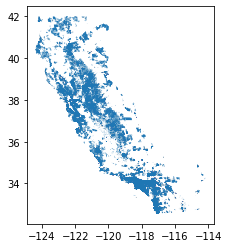

In [4]:
consumer_deployment.plot()

<h4>Filtering the data to include only two columns, BlockCode and DBA</h4>

In [5]:
isps = consumer_deployment.filter(['BlockCode','DBA'], axis=1)

<h4>Taking a peek at the filtered ISP data</h4>

In [6]:
isps.head()

,BlockCode,DBA
0,060230101023137,Aan Chuuphan
1,060230101023139,Aan Chuuphan
2,060230101023141,Aan Chuuphan
3,060230101023154,Aan Chuuphan
4,060230101023155,Aan Chuuphan


<h4>Dropping duplicate ISPs in each block (when one ISP provides multiple types of services in one block)</h4>

In [7]:
isps = isps.drop_duplicates(subset=['BlockCode', 'DBA'])

<h4>Checking data types of both columns of ISP data</h4>

In [8]:
isps.dtypes

BlockCode    object
DBA          object
dtype: object

<h4>Changing data type of BlockCode to int64 so it matches with the population data</h4>

In [9]:
isps = isps.astype({'BlockCode': 'int64'})

<h4>Verifying change of data type</h4>

In [10]:
isps.dtypes

BlockCode     int64
DBA          object
dtype: object

<h4>Counting the number of rows in the ISP data</h4>

In [11]:
isps.count()

BlockCode    701903
DBA          701903
dtype: int64

<h4>Loading population data</h4>

In [12]:
population = pandas.read_csv("../../Data/R12742217_SL100.csv", low_memory=False)

<h4>Taking a peek at the loaded population data</h4>

In [13]:
population.head()

,Geo_NAME,Geo_QName,Geo_AREALAND,Geo_AREAWATR,Geo_SUMLEV,Geo_GEOCOMP,Geo_REGION,Geo_DIVISION,Geo_FIPS,Geo_STATE,...,SE_T001_001,SE_T058_001,SE_T058_002,SE_T058_003,SE_T058_004,SE_T058_005,SE_T058_006,SE_T058_007,SE_T058_008,SE_T058_009
0,Block 1000,"Block 1000, Block Group 1, Census Tract 4001, ...",590336.0,0,100,0,4,9,60014001001000,6,...,0,0,0,0,0,0,0,0,0,0
1,Block 1001,"Block 1001, Block Group 1, Census Tract 4001, ...",22089.0,0,100,0,4,9,60014001001001,6,...,0,0,0,0,0,0,0,0,0,0
2,Block 1002,"Block 1002, Block Group 1, Census Tract 4001, ...",9433.0,0,100,0,4,9,60014001001002,6,...,0,0,0,0,0,0,0,0,0,0
3,Block 1003,"Block 1003, Block Group 1, Census Tract 4001, ...",1354.0,0,100,0,4,9,60014001001003,6,...,0,0,0,0,0,0,0,0,0,0
4,Block 1004,"Block 1004, Block Group 1, Census Tract 4001, ...",7977.0,0,100,0,4,9,60014001001004,6,...,0,0,0,0,0,0,0,0,0,0


<h4>Filtering the data to include only two columns, Geo_FIPS, SE_T001_001, and SE_T058_001</h4>

<h5>Geo_FIPS is the Block Code and SE_T001_001 is the total population, and SE_T058_001 is the number of households within that census block according to the 2010 census</h5>

In [14]:
total_population_by_block = population[['Geo_FIPS','SE_T001_001', 'SE_T058_001']]

<h4>Checking data types of columns of population data</h4>

In [15]:
total_population_by_block.dtypes

Geo_FIPS       int64
SE_T001_001    int64
SE_T058_001    int64
dtype: object

<h4>Counting number of rows in the population data</h4>

In [16]:
total_population_by_block.count()

Geo_FIPS       710145
SE_T001_001    710145
SE_T058_001    710145
dtype: int64

<h4>Joining ISP data with population data on the matching census block code</h4>

In [17]:
joined_data = isps.set_index('BlockCode').join(total_population_by_block.set_index('Geo_FIPS'))

<h4>Taking a peek at the joined data</h4>

In [18]:
joined_data.head()

,DBA,SE_T001_001,SE_T058_001
60014001001007,"AT&T Service, Inc.",117,53
60014001001007,Comcast,117,53
60014001001007,Sonic.net,117,53
60014001001008,"AT&T Service, Inc.",20,9
60014001001008,Comcast,20,9


<h4>Grouping the joined data by DBA (which is the ISP) and summing the total population to get the maximum population served by the ISP</h4>

In [19]:
final = joined_data.groupby(by=["DBA"]).sum()[['SE_T001_001','SE_T058_001']]

<h4>Renaming columns</h4>

In [20]:
final = final.rename(columns={"SE_T001_001": "Population", "SE_T058_001": "Households"})

<h4>Printing a sample of the grouped data</h4>

In [21]:
final

,Population,Households
DBA,,
101Netlink,22493,9475
AFES Network Services LLC,5958,2180
"AT&T Service, Inc.",25008549,8573657
AVISP,4238,1653
Aan Chuuphan,415,171
...,...,...
Winters Broadband LLC,8049,2941
Zeta Broadband,36271,13845
Zito Media,42981,15576


<h4>Writing ISP data to CSV file which shows the maximum population served by the ISP</h4>

In [22]:
final.to_csv('isp_population.csv', index=True)  